<a href="https://colab.research.google.com/github/devyulbae/AIClass/blob/main/03_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic Regression

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.15.0'

## Make a dataset for Logistic Regression

### Logistic Regression을 위한 Dataset을 임의로 만들어 봅시다.

* 2가지 위치에 몰려있는 데이터
* 테스트를 위한 빨간색 데이터

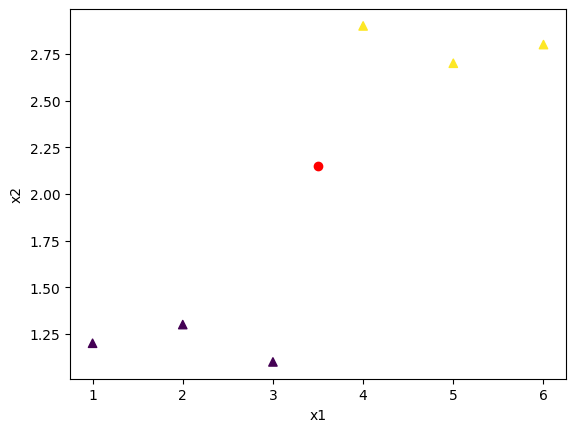

In [2]:
x_train = [[1., 1.2],
          [2., 1.3],
          [3., 1.1],
          [4., 2.9],
          [5., 2.7],
          [6., 2.8]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[3.5,2.15]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## tf.data.Dataset
* 데이터를 관리해주기위한 tf function
* 각 데이터의 필요 기능들을 지원해준다.
* 데이터셋 크기가 클 경우에 메모리에 나눠올리는 기능을 지원

In [ ]:
# dataset = tf.data.Dataset.from_tensor_slices(
#     (x_train, y_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices(
    (x_train, y_train)).batch(len(x_train))

# for t, l in dataset:
#   print(t, l)
#   break

In [ ]:


W = tf.Variable(tf.random.normal([2,1]), name='weight')
b = tf.Variable(tf.random.normal([1]), name='bias')

tf.print(W, b)

[[1.04996371]
 [-0.708254874]] [0.0111861359]


## Sigmoid 함수를 가설로 선언합니다
* Sigmoid는 아래 그래프와 같이 0과 1의 값만을 리턴합니다 tf.sigmoid(tf.matmul(X, W) + b)와 같습니다

## $$
\begin{align}
sigmoid(x) & = \frac{1}{1+e^{-x}}  \\\\\
\end{align}
$$

![sigmoid](https://upload.wikimedia.org/wikipedia/commons/8/88/Logistic-curve.svg)

In [ ]:
def logistic_regression(features):
    hypothesis  = tf.divide(1., 1. + tf.exp(-(tf.matmul(features, W) + b)))
    # tf.sigmoid(tf.matmul(features, W) + b)
    return hypothesis

tf.print(logistic_regression(x_train))

[[0.552615464]
 [0.766809404]
 [0.915444136]
 [0.896330535]
 [0.966062784]
 [0.986975968]]


## 가설을 검증할 Cost 함수를 정의합니다
$$
\begin{align}
cost(h(x),y) & = −log(h(x))  &  if :  &  y=1 \\\\\
cost(h(x),y) & = -log(1−h(x))  &  if :  &  y=0
\end{align}
$$

### 두 식을 한번에 쓰게되면,

$$
\begin{align}
cost(h(x),y) & = −y log(h(x))−(1−y)log(1−h(x))
\end{align}
$$

In [ ]:
def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.math.log(hypothesis) + \
                           (1 - labels) * tf.math.log(1 - hypothesis))
    return cost

optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate=0.001)

In [ ]:
epochs = 5000

for step in range(epochs):
  for features, labels in dataset:
    with tf.GradientTape() as tape:
      loss_value = loss_fn(logistic_regression(features),labels)
      grads = tape.gradient(loss_value, [W,b])
      optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
      if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(logistic_regression(features),labels)))

Iter: 0, Loss: 0.8139
Iter: 100, Loss: 0.7479
Iter: 200, Loss: 0.6982
Iter: 300, Loss: 0.6630
Iter: 400, Loss: 0.6396
Iter: 500, Loss: 0.6247
Iter: 600, Loss: 0.6151
Iter: 700, Loss: 0.6089
Iter: 800, Loss: 0.6045
Iter: 900, Loss: 0.6012
Iter: 1000, Loss: 0.5984
Iter: 1100, Loss: 0.5958
Iter: 1200, Loss: 0.5934
Iter: 1300, Loss: 0.5911
Iter: 1400, Loss: 0.5888
Iter: 1500, Loss: 0.5866
Iter: 1600, Loss: 0.5844
Iter: 1700, Loss: 0.5821
Iter: 1800, Loss: 0.5799
Iter: 1900, Loss: 0.5778
Iter: 2000, Loss: 0.5756
Iter: 2100, Loss: 0.5734
Iter: 2200, Loss: 0.5713
Iter: 2300, Loss: 0.5691
Iter: 2400, Loss: 0.5670
Iter: 2500, Loss: 0.5649
Iter: 2600, Loss: 0.5628
Iter: 2700, Loss: 0.5607
Iter: 2800, Loss: 0.5586
Iter: 2900, Loss: 0.5565
Iter: 3000, Loss: 0.5545
Iter: 3100, Loss: 0.5524
Iter: 3200, Loss: 0.5504
Iter: 3300, Loss: 0.5484
Iter: 3400, Loss: 0.5463
Iter: 3500, Loss: 0.5443
Iter: 3600, Loss: 0.5423
Iter: 3700, Loss: 0.5404
Iter: 3800, Loss: 0.5384
Iter: 3900, Loss: 0.5364
Iter: 4000, 

In [ ]:
def accuracy_fn(hypothesis, labels):
    print(hypothesis)
    predicted = tf.cast(hypothesis > 0.5, dtype=tf.float32)
    print(predicted, labels)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype=tf.float32))
    return accuracy

In [ ]:
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

tf.Tensor([[0.6261996]], shape=(1, 1), dtype=float32)
tf.Tensor([[1.]], shape=(1, 1), dtype=float32) [[1.0]]
Testset Accuracy: 1.0000
